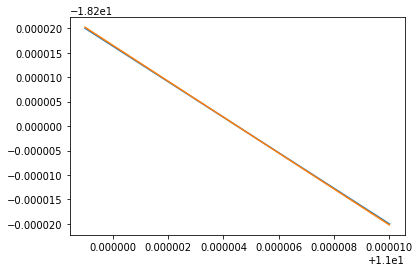

In [21]:
import numpy as np
import matplotlib.pyplot as plt


def recta_1(x):
    return 3.8 -2*x

def recta_2(x):
    return 4.02 - 2.02 * x



#plt.plot([-10, 10], [0,0])
#plt.plot([0,0], [-10, 10])

plt.plot([10.999999, 11.00001], [recta_1(10.99999), recta_1(11.00001)])
plt.plot([10.999999, 11.00001], [recta_2(10.99999), recta_2(11.00001)])
plt.show()

In [48]:
import numpy as np 
def Gauss_Seidel (A, b, epsilon, max_iter, x0):
    """
    Resuelve un sistema de ecuaciones mediante el método iterativo de Gauss Seidel
    
    Parametros:
    A (matriz de numeros reales): Matriz de coeficientes
    b (lista de numeros reales): Vector de terminos independientes
    epsilon (float): Error maximo
    max_iter (entero positivo): Maxima cantidad de iteraciones
    x0 (lista de numeros reales): vector inicial
    
    Retorna:
    Tupla:
        Arreglo de numeros reales: Vector de términos de incógnita
        Entero positivo: Cantidad de iteraciones transcurridas
    ó
    Mensaje, si el método no converge en la máxima cantidad de iteraciones
    """
    #Inicializar variables
    k = 0
    error = 2*epsilon
    x1 = x0.copy()
    
    while (k < max_iter and error >= epsilon):       
        k = k+1
        
        x0 = x1.copy()
        
        for i in range(0, len(A)):
            sumatoria = 0

            #Sumatoria excluyendo la i-esima componente
            for j in range(0, i):
                sumatoria = sumatoria + A[i][j] * x1[j]
            for j in range(i+1, len(A)):
                sumatoria = sumatoria + A[i][j] * x0[j]
            
            x1[i] = (b[i] - sumatoria)/ A[i][i]
        
        error = np.abs(np.max(np.abs(x1) - np.abs(x0)))
        
    if (k >= max_iter):
        print("No converge en maxima cantidad de iteraciones")
        raise
    else:
        return (x1, k) 


    
A = [[2, -1, 0], 
    [1, 6, -2], 
    [4, -3, 8]]

b = [2, -4, 5]
x0 = [0.0, 0.0, 0.0]
max_iter = 10
epsilon = 10**-6



print("Datos del sistema")
print("Matriz de coeficientes:")
for i in range(0,len(A)):
    print(A[i])
print(f"Vector de términos independientes: {b}")    
print("")
print("Aplicando el método de Gauss-Seidel")
print(f"Maxima cantidad de iteraciones: {max_iter}")
print(f"Máximo error: {epsilon}")
print("")

try:
    resul, iter_transcurr = Gauss_Seidel(A, b, epsilon, max_iter, x0)
except:
    pass
else:    
    print(f"Vector resultante: {resul}")
    print(f"Iteraciones transcurridas: {iter_transcurr}")


Datos del sistema
Matriz de coeficientes:
[2, -1, 0]
[1, 6, -2]
[4, -3, 8]
Vector de términos independientes: [2, -4, 5]

Aplicando el método de Gauss-Seidel
Maxima cantidad de iteraciones: 10
Máximo error: 1e-06

No converge en maxima cantidad de iteraciones


In [74]:
import time
def leer_matriz(path):
    """Retorna una matriz leída de un archivo de texto de la ruta especificada."""
    
    matriz = []
    try:
        file = open(path, 'r')
    except:
        print("Error al abrir el archivo")
        raise
    else:
        for line in file:
            matriz.append(list(map(float, line.split(','))))
        file.close()
        return matriz

def leer_vector(path):
    """Retorna un vector leído de un archivo de texto de la ruta especificada."""
    
    vector = []
    try:
        file = open(path, 'r')
    except:
        print("Error al abrir el archivo")
        raise
    else:
        for line in file:
            vector.append(float(line))
        file.close()
        return vector

In [75]:
#Obtener matriz de coeficientes
A = leer_matriz('Sistema50x50\\A.txt')

#Obtener vector de términos independientes
b = leer_vector('Sistema50x50\\B.txt')

#Obtener vector de valores iniciales
x0 = leer_vector('Sistema50x50\\X.txt')


max_iter = 30
epsilon = 10**-6

start_time = time.time()
try:
    resul, iter_transcurr = Gauss_Seidel(A, b, epsilon, max_iter, x0)
except:
    pass
else:
    print("Solucion del sistema:")
    print("")

    for num in resul:
        print(num)
    print("")
    print(f"Iteraciones transcurridas: {iter_transcurr}")
finally:
    stop_time = time.time()
    print(f"Tiempo transcurrido: {np.round(stop_time - start_time, 3)} segundos")

Solucion del sistema:

0.08250851321592033
0.028176342805828293
-0.0070202189578096
-0.008722181433413571
0.007437534532669804
-0.001354035319107978
-0.0012999012832285173
-0.002673283253032325
-0.02039141914536207
0.0025247004486823287
0.02591349385824583
0.009530037002273032
-0.02004440621948197
-0.005448146507866869
-0.017313620013809455
-0.008262861994618075
-0.0036669718646025647
-0.00232562472819065
-0.0017049408557576172
-0.0008331174545077055
-0.010455733614928735
0.005656699089452378
0.010766703627868296
0.005016976762504468
-0.012836364445096908
-0.01123776614551845
0.0021331132693118834
-0.0013193125388426792
-0.0047775450850575055
0.0010331632590582002
0.004644414446276248
-0.000999259233795371
0.0062247534065557
-0.01068511895510617
0.00871123042472014
-0.009138138574203722
-0.012231863157918134
-0.009630685377407917
0.008934530198692994
0.01587807908145223
0.004122138487793446
-0.006441267961035689
0.006605618028383633
0.11918763303220996
0.023892444447341024
0.0016839118

In [76]:
#Obtener matriz de coeficientes
A = leer_matriz('Sistema500x500\\A.txt')

#Obtener vector de términos independientes
b = leer_vector('Sistema500x500\\B.txt')

#Obtener vector de valores iniciales
x0 = leer_vector('Sistema500x500\\X.txt')


max_iter = 30
epsilon = 10**-6

start_time = time.time()
try:
    resul, iter_transcurr = Gauss_Seidel(A, b, epsilon, max_iter, x0)
except:
    pass
else:
    print("Solucion del sistema:")
    print("")

    for num in resul:
        print(num)
    print("")
    print(f"Iteraciones transcurridas: {iter_transcurr}")
finally:
    stop_time = time.time()
    print(f"Tiempo transcurrido: {np.round(stop_time - start_time, 3)} segundos")

Solucion del sistema:

-0.0008505291029789378
-3.0006269884185143e-05
-0.0010406311682690486
0.014545595399558109
-0.0007480363982687074
-0.0010048998695632726
0.008614045512963521
0.0002848985287761965
-0.001366846186288105
0.010440521068631572
0.00017214852140792013
-0.000735624441147053
-0.0020466869018346576
-0.0012835881134301904
0.004054294999379874
0.009602293626272122
0.005347781008837713
-0.0004980219929027322
-0.0017659763987350823
-0.0023305251272336992
-0.0020723108800130637
0.009781868718092696
4.123843772658826e-05
-0.0014322169247549944
-0.000921436784942966
-0.0016666859916556374
-0.00042153113279901587
-0.0005627089617719393
-0.0013638912746921409
0.0035306244820336296
-0.0012818235691905825
0.011197355851501159
0.011863251532801683
0.010819725160321992
-0.0009114936904305137
-0.0007836399043249726
-0.0017313315710408917
-0.000522084026802574
0.010775752970545654
-0.00019212526631667633
-0.0017697564476749352
-0.0001363012259475044
-0.0009746890277662881
-0.00077877258

In [77]:
#Obtener matriz de coeficientes
A = leer_matriz('Sistema1000x1000\\A.txt')

#Obtener vector de términos independientes
b = leer_vector('Sistema1000x1000\\B.txt')

#Obtener vector de valores iniciales
x0 = leer_vector('Sistema1000x1000\\X.txt')


max_iter = 30
epsilon = 10**-6

start_time = time.time()
try:
    resul, iter_transcurr = Gauss_Seidel(A, b, epsilon, max_iter, x0)
except:
    pass
else:
    print("Solucion del sistema:")
    print("")

    for num in resul:
        print(num)
    print("")
    print(f"Iteraciones transcurridas: {iter_transcurr}")
finally:
    stop_time = time.time()
    print(f"Tiempo transcurrido: {np.round(stop_time - start_time, 3)} segundos")

Solucion del sistema:

-0.0003995814899085479
0.0021545752420215063
0.0003425586205320571
0.006209493802417736
-0.0006892221572588983
0.00011272518032064537
-0.0007132094458020162
-0.00021081917822495089
-0.0007612287785990883
-0.0009063696525769037
-0.0007308157948806901
-0.000861828036889516
-0.0006023551691657854
0.0001431831642705818
-0.0005576691335322709
-0.0005721204921037657
-0.0002643192884645167
-0.00044056262982026867
-0.000943309486131671
-0.0007445467049080871
0.00032544399542741657
-0.0006883480587246204
-0.000959658759442014
-0.0008220950912732391
0.004741884743243411
-0.00010302223699280272
0.0012110874295448268
-0.0008222428530347117
0.0002457364022741981
-0.0005391132157535472
-0.0007212741213083788
-0.0005816834620815893
-0.0006891932860871897
-0.00083139424481454
-0.0010068056059772733
-0.0008259494736044188
-0.0009735024182242105
-0.000474633924969503
0.001294524089516257
-0.0008229073745892019
0.0038663012071008655
0.007155155230539831
-0.0007764120773673489
-0.00

-0.0004159690108094526
-0.0006523326692117993
-0.0009932718542173967
-0.0008437825259377512
3.1694061596396866e-05
-1.679460595352186e-05
-0.00021746577158741014
-0.0005914148745413789
-0.0006078579204349804
-0.0008505274223891352
-0.00086244154609507
-0.0006903456658837947
-0.0005049030503617942
-0.0005251337589409375
-0.0010714944660229061
-0.0007792778183556852
0.004812604764459636
-0.0009985200930577758
0.0066060622390566115
-0.0011569519547831098
-0.0003522987841152067
0.004724618280140595
0.007228047993007666
-0.0006142806636835517
0.004688547668310718
9.352340759186882e-05
-0.0004983324390614863
-0.0008712703434241758
0.005034655915576549
-0.0006766769428412604
-0.0004813517582857012
-0.0003586394931731074
-0.0005089134743680786
-0.00047001521476186764
-0.0005641705045223614
0.00044687786486530983
-0.0009589017674879042
-0.00047561687958277694
-0.00047603400151873367
0.00015108497100873417
0.007005505514361255
-0.0008512556992043385
0.0031562470316954393
-0.00031510218455337545


In [81]:
#Obtener matriz de coeficientes
A = leer_matriz('Sistema2000x2000\\A.txt')

#Obtener vector de términos independientes
b = leer_vector('Sistema2000x2000\\B.txt')

#Obtener vector de valores iniciales
x0 = leer_vector('Sistema2000x2000\\X.txt')


max_iter = 500
epsilon = 10**-6

start_time = time.time()
try:
    resul, iter_transcurr = Gauss_Seidel(A, b, epsilon, max_iter, x0)
except:
    pass
else:
    print("Solucion del sistema:")
    print("")

    for num in resul:
        print(num)
    print("")
    print(f"Iteraciones transcurridas: {iter_transcurr}")
finally:
    stop_time = time.time()
    print(f"Tiempo transcurrido: {np.round(stop_time - start_time, 3)} segundos")

Solucion del sistema:

0.026518067415793132
-0.002901955923401394
-0.0009742628123461868
-0.008879102561905173
-0.01354783093963415
0.015703353973311452
0.002081125459734878
0.0014546295754691682
-0.00386539871782761
-0.001227949135120116
0.012729251688800135
-0.0096620459699927
0.0036306365426015895
-0.0015310160143697934
0.004604375392238037
-0.008794129556645786
0.011731940074332006
-0.0007294236173011978
-0.007985031109956674
-0.001747053797069771
-0.002863711317126642
-0.0075630345351266936
0.014850304370706375
-0.004588966365622835
-0.00952624262674426
0.03732164839745036
0.011179526793562582
-0.006794837557938875
-0.006548824096382861
6.337909526036077e-05
-0.0004164408508666095
-0.000857049580711289
-0.0005027442258474365
0.01982635248974688
0.001862027853020592
-0.0007239203196704883
0.002216428092683149
0.018030344107612086
-0.00874274790321703
-0.003185661805368206
-0.009891801989335468
-0.004544306580339572
0.008010927552742169
0.007109769828576903
0.003130257854282693
-0.0

0.0012067904835404092
-0.005828413925089694
-0.004556594300180284
-0.0035211263452849455
0.02565187216637865
-0.010784332102882358
0.0012312909588481145
-0.0036898376937909236
-0.003488781379218319
-0.006283824021178607
-0.008093541274075616
0.00807654738591029
-0.003126156978437984
0.004532970430091893
-0.008111985683165238
-0.002631658167882149
0.017546201176789653
-0.0031218752469122837
-0.0004677653911861057
-0.010599919594593516
-0.0034834294508167447
0.030980373490528373
-0.003163992021279562
0.0017955033297559263
-0.0026213956973264872
-0.0023845805155457128
0.0027752249269727925
-0.0031483285531625203
0.03789590240631751
0.012380034024898914
-0.00064544334965422
-0.0037092048169757876
0.003757972786989641
-0.0017944497124478714
0.003311200514735146
0.001300776974765913
-0.007513295736201024
-0.004936606548227465
-0.008771889150932377
0.026008683554396474
-0.010099209128758356
-0.0033677853908873315
-0.008205664965100404
-0.0029489141257972896
-0.007409760748935155
0.02338019929

-0.014839430621722272
0.0026066872201351977
-0.004193628825823822
-0.005844016416543539
-0.007163530799597296
-0.002464584057478525
-0.009921901819254918
-0.006101454355130853
0.0015289381034184492
-0.011981549231715828
-0.010583901363770737
0.011760643419949408
-0.004594414564399235
-0.0017167640963808221
-0.0038308891574915624
-0.0010987400384021866
-0.004877620896574474
-0.012727070099542392
-0.009456954673160612
-0.0014798180282842804
0.0037039756877663772
0.00447350266842082
-0.007364699558894195
-0.008426163179269088
-0.0009613333638297276
-0.009865647528753834
-0.008773341182720319
-0.004019791535937737
-0.004812122517663332
-0.00556101066755617
0.031476999081499306
0.01863425353472743
-0.004189519141290662
0.0015908323080719117
-0.006649950530715696
-0.006854969319925155
-0.010734129641507105
0.007836173831985958
0.021721585748268216
-0.004559413894621888
-0.010799146607107181
0.033376895408374144
-0.0034323872976584186
0.015915708210499133
-0.0005204565587652003
0.001291967721

-0.009714805169619053
0.0307417599598169
-0.0017748083917000347
0.002153031276025619
0.026983393665618867
-0.005651196174084161
0.02084552028256682
-0.009956405538053333
-0.0014307029693658997
0.019019723212886943
0.003786506923117305
-0.006818716187430472
-0.008516860281340355
-0.006987276946634418
-0.009365319516648828
0.00223698035871517
-0.0006234719386725598
-0.00643730665113599
-0.0014533406265291955
0.0002466265602718704
0.02950870557706667
-0.0005914251624063232
-0.00255278449739573
0.00023193276877945683
0.0020752243044432185
0.035102721282041324
-0.0031002680216817105
-0.0025203930768837894
0.006245646494641846
0.0034471461889928356
-0.006065589157230004
-0.004861395309835365
0.0022843349680051832
-0.00556353649626782
0.022823531712590127
-0.001567715690004735
0.020311272889479377
-0.004341897684228075
-0.002802863976094281
-0.005395132694285758
-0.003341852809486741
-0.007721388063756634
-0.0011731721429161465
-0.01259721852950236
-0.011783658137749675
-0.00567704317088393
-

In [79]:
#Obtener matriz de coeficientes
A = leer_matriz('Sistema10000x10000\\A.txt')

#Obtener vector de términos independientes
b = leer_vector('Sistema10000x10000\\B.txt')

#Obtener vector de valores iniciales
x0 = leer_vector('Sistema10000x10000\\X.txt')


max_iter = 1000
epsilon = 10**-6

start_time = time.time()
try:
    resul, iter_transcurr = Gauss_Seidel(A, b, epsilon, max_iter, x0)
except:
    pass
else:
    print("Solucion del sistema:")
    print("")

    for num in resul:
        print(num)
    print("")
    print(f"Iteraciones transcurridas: {iter_transcurr}")
finally:
    stop_time = time.time()
    print(f"Tiempo transcurrido: {np.round(stop_time - start_time, 3)} segundos")

No converge en maxima cantidad de iteraciones
Tiempo transcurrido: 47.545 segundos


In [62]:
import numpy as np 
def Gauss_Seidel_SOR (A, b, epsilon, max_iter, x0, omega):
    """
    Resuelve un sistema de ecuaciones mediante el método iterativo de Gauss Seidel con Sobrerelajación
    
    Parametros:
    A (matriz de numeros reales): Matriz de coeficientes
    b (lista de numeros reales): Vector de terminos independientes
    epsilon (float): Error maximo
    max_iter (entero positivo): Maxima cantidad de iteraciones
    x0 (lista de numeros reales): vector inicial
    
    Retorna:
    Tupla:
        Arreglo de numeros reales: Vector de términos de incógnita
        Entero positivo: Cantidad de iteraciones transcurridas
    ó
    Mensaje, si el método no converge en la máxima cantidad de iteraciones
    """
    #Inicializar variables
    k = 0
    error = 2*epsilon
    x1 = x0.copy()
    
    while (k < max_iter and error >= epsilon):       
        k = k+1
        
        x0 = x1.copy()
        
        for i in range(0, len(A)):
            sumatoria = 0

            #Sumatoria excluyendo la i-esima componente
            for j in range(0, i):
                sumatoria = sumatoria + A[i][j] * x1[j]
            for j in range(i+1, len(A)):
                sumatoria = sumatoria + A[i][j] * x0[j]
            
            x1[i] = (b[i] - sumatoria)/ A[i][i]
            x1[i] = ( omega * x1[i] ) + ( (1 - omega) * x0[i] )
        
        error = np.abs(np.max(np.abs(x1) - np.abs(x0)))
        
    if (k >= max_iter):
        print("No converge en maxima cantidad de iteraciones")
        raise
    else:
        return (x1, k) 


    
A = [[4, 3, 0], 
    [3, 4, -1], 
    [0, -1, 4]]

b = [24, 30, 24]
x0 = [0.0, 0.0, 0.0]
max_iter = 100
epsilon = 10**-6



print("Datos del sistema")
print("Matriz de coeficientes:")
for i in range(0,len(A)):
    print(A[i])
print(f"Vector de términos independientes: {b}")    
print("")
print("Aplicando el método de Gauss-Seidel con sobrerelajación")
print(f"Maxima cantidad de iteraciones: {max_iter}")
print(f"Máximo error: {epsilon}")
print("")

for i in np.arange(0.1, 2, 0.1):
    print(f"Factor SOR = {i}")
    try:
        resul, iter_transcurr = Gauss_Seidel_SOR(A, b, epsilon, max_iter, x0, i)
    except:
        pass
    else:    
        print(f"Vector resultante: {resul}")
        print(f"Iteraciones transcurridas: {iter_transcurr}")
    finally:
        print("")


Datos del sistema
Matriz de coeficientes:
[4, 3, 0]
[3, 4, -1]
[0, -1, 4]
Vector de términos independientes: [24, 30, 24]

Aplicando el método de Gauss-Seidel con sobrerelajación
Maxima cantidad de iteraciones: 100
Máximo error: 1e-06

Factor SOR = 0.1
No converge en maxima cantidad de iteraciones

Factor SOR = 0.2
No converge en maxima cantidad de iteraciones

Factor SOR = 0.30000000000000004
No converge en maxima cantidad de iteraciones

Factor SOR = 0.4
No converge en maxima cantidad de iteraciones

Factor SOR = 0.5
No converge en maxima cantidad de iteraciones

Factor SOR = 0.6
Vector resultante: [-2.9999950910326785, 11.999995277571905, 8.99999863710681]
Iteraciones transcurridas: 80

Factor SOR = 0.7000000000000001
Vector resultante: [-2.999996699170693, 11.999996902147668, 8.999999127792911]
Iteraciones transcurridas: 65

Factor SOR = 0.8
Vector resultante: [-2.9999975812743833, 11.999997797306243, 8.999999398212875]
Iteraciones transcurridas: 53

Factor SOR = 0.9
Vector resulta